# Question 1

In [24]:
cutlet = pd.read_csv('Cutlets.csv')
len(cutlet)

35

In [16]:
unita = cutlet['Unit A'].array
unita

<PandasArray>
[ 6.809, 6.4376, 6.9157, 7.3012, 7.4488, 7.3871, 6.8755, 7.0621,  6.684,
 6.8236,  7.393, 7.5169, 6.9246, 6.9256, 6.5797, 6.8394,  6.597, 7.2705,
 7.2828, 7.3495, 6.9438,  7.156, 6.5341, 7.2854, 6.9952, 6.8568, 7.2163,
 6.6801, 6.9431, 7.0852, 6.7794, 7.2783, 7.1561, 7.3943, 6.9405]
Length: 35, dtype: float64

In [17]:
unitb = cutlet['Unit B'].array
unitb

<PandasArray>
[6.7703, 7.5093,   6.73, 6.7878, 7.1522,  6.811, 7.2212, 6.6606, 7.2402,
 7.0503,  6.881, 7.4059, 6.7652,  6.038, 7.1581,  7.024, 6.6672, 7.4314,
  7.307, 6.7478, 6.8889,  7.422, 6.5217, 7.1688, 6.7594, 6.9399, 7.0133,
 6.9182, 6.3346, 7.5459, 7.0992,  7.118, 6.6965,  6.578, 7.3875]
Length: 35, dtype: float64

In [6]:
from scipy.stats import chi2_contingency

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [56]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [57]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

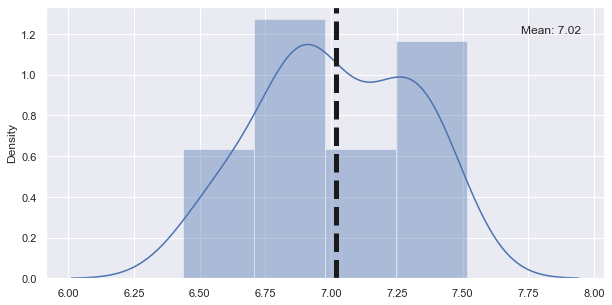

In [59]:
plot_distribution(unita)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

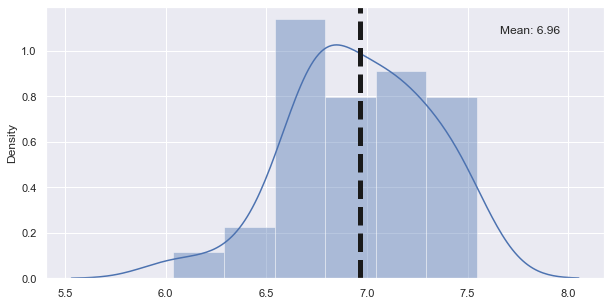

In [58]:
plot_distribution(unitb)

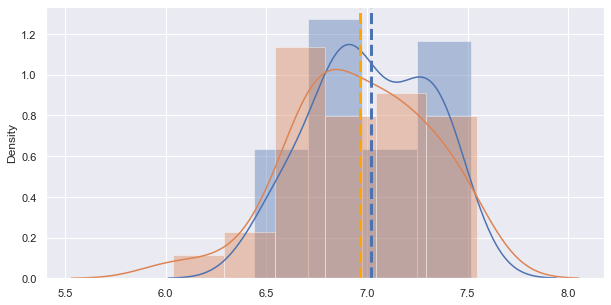

In [60]:
plt.figure()
ax1 = sns.distplot(unita)
ax2 = sns.distplot(unitb)
plt.axvline(np.mean(unita), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(unitb), color='orange', linestyle='dashed', linewidth=3)

In [21]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [35]:
sample_size = 35
a_sampled = np.random.choice(unita, sample_size)
b_sampled = np.random.choice(unitb, sample_size)
compare_2_groups(a_sampled, b_sampled, 0.05, sample_size)

Statistics=2.054, p=0.044
Different distributions (reject H0)


#### There is no significant difference in the diameter of the cutlet between two units.

# Question 2

In [40]:
df = pd.read_csv('LabTAT.csv')
df

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [43]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Laboratory 1', 'Laboratory 2',
                                                                   'Laboratory 3', 'Laboratory 4'])

In [44]:
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

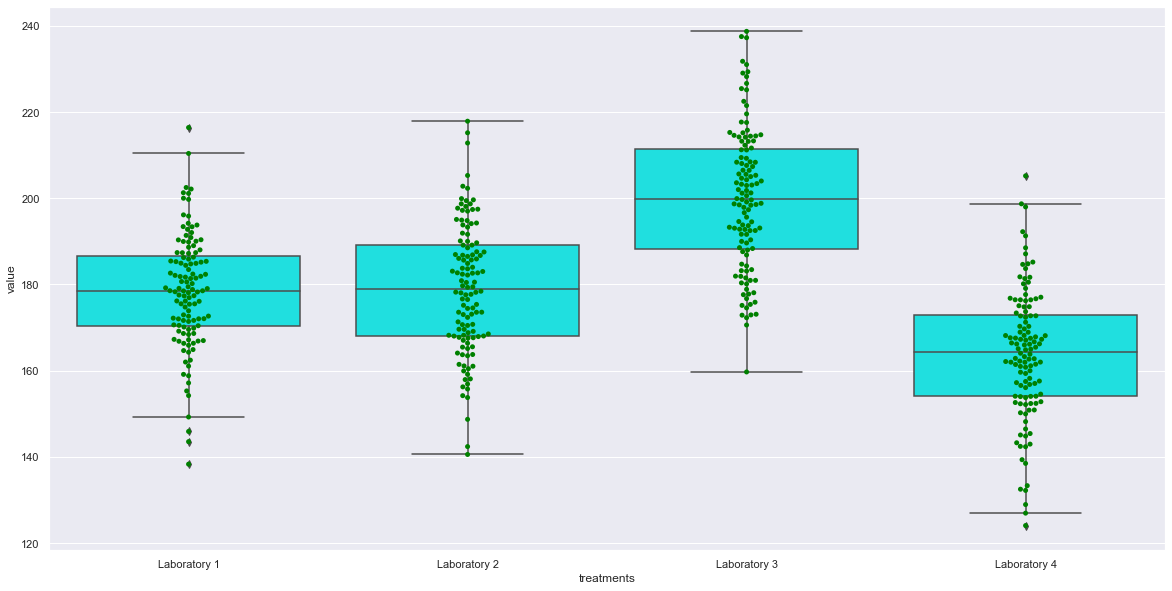

In [55]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='cyan')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='green')
plt.show()

In [46]:
fvalue, pvalue = stats.f_oneway(df['Laboratory 1'], df['Laboratory 2'], df['Laboratory 3'], df['Laboratory 4'])
print(fvalue, pvalue)

118.70421654401437 2.1156708949992414e-57


##### Here, the p value is approximately equal to 0, so we reject the null hypothesis
there are significant differences amongst treatments.

# Question 3

In [47]:
pd.read_csv('BuyerRatio.csv')

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [48]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [78]:
from scipy.stats import chi2_contingency

# defining the table
data = [[50, 142, 131, 70], [435, 1523, 1356, 750]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 0.6603094907091882
Independent (H0 holds true)


##### since the null hypothesis holds true, male-female buyer ratios are similar across regions!

# Question 4

In [81]:
from scipy.stats import chi2

In [65]:
custom = pd.read_csv('Costomer+OrderForm.csv')
custom

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [69]:
print(custom['Phillippines'].value_counts(),
      custom['Indonesia'].value_counts(),
      custom['Malta'].value_counts(),
      custom['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 Error Free    269
Defective      31
Name: Malta, dtype: int64 Error Free    280
Defective      20
Name: India, dtype: int64


In [70]:
observed=([[271,267,269,280],[29,33,31,20]])

In [71]:
stat, p, dof, expected = chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [72]:
stat

3.858960685820355

In [73]:
p

0.2771020991233135

In [74]:
print('dof=%d' % dof)
print(expected)

dof=3
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [82]:
alpha = 0.05
prob=1-alpha
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0),variables are related')
else:
	print('Independent (fail to reject H0), variables are not related')

probability=0.950, critical=7.815, stat=1.596
Independent (fail to reject H0), variables are not related


In [80]:
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.660
Independent (fail to reject H0)


###### here, null hypothesis is not rejected